# Cloning the ML Course repository from GV-Americas

**!git clone** downloads the repository with all notebooks and files inside it and creates a copy in the current directory.

**sys** allows you to import modules within it: **plotting_gv**!

In [1]:
# Downloads dataset from GitHub
!curl -o phosphate_assay_sampled_geomet.csv https://raw.githubusercontent.com/gv-americas/ml_course_americas/main/phosphate_assay_sampled_geomet.csv

# If you are in a Google Colab session, make sure to also download the GeoVariances module for plotting!
# !curl -o plotting_gv.py https://raw.githubusercontent.com/gv-americas/ml_course_americas/main/plotting_gv.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  382k  100  382k    0     0  1377k      0 --:--:-- --:--:-- --:--:-- 1384k


## Importing four libraries:

**Pandas**: used for data manipulation and analysis.

**Numpy**: used for scientific computing and working with arrays.

**Matplotlib**: used for data visualization and creating plots.

**Plotting_gv**: a custom plotting library created by GV Americas, which contains additional plotting functions and custom styles.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotting_gv as gv

# Reading data with Pandas

In [3]:
data = pd.read_csv('phosphate_assay_sampled_geomet.csv')

data

,Name,X,Y,Z,Depth From,Depth To,Length,AL2O3,ALT,BAO,CAO,Consumo_coletor_(g/t),FE2O3,MASSA_T,MGO,NB2O5,P2O5,SIO2,TIO2
0,DH1,2634.56,1816.84,407.75,0.00,5.00,5.00,32.33,ALT1,0.16,0.16,716.00,17.50,13.35,0.10,0.07,1.06,18.65,4.55
1,DH1,2634.56,1816.84,402.75,5.00,10.00,5.00,30.17,ALT1,0.20,0.20,716.00,16.63,13.21,0.11,0.06,1.29,23.69,4.19
2,DH1,2634.56,1816.84,397.75,10.00,15.00,5.00,28.39,ALT1,0.26,0.24,722.50,15.84,13.20,0.12,0.06,1.60,28.66,3.86
3,DH1,2634.56,1816.84,392.75,15.00,20.00,5.00,28.05,ALT1,0.29,0.30,722.50,15.87,13.20,0.13,0.06,1.82,28.62,3.92
4,DH1,2634.56,1816.84,387.75,20.00,25.00,5.00,26.02,ALT1,0.42,0.42,724.75,17.88,13.16,0.17,0.09,2.45,26.02,4.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,DH94,4013.90,2298.57,329.69,102.00,104.85,2.85,3.63,ALT4,0.27,16.93,708.25,11.95,13.33,12.64,0.12,3.63,28.84,4.49
3680,DH94,4013.90,2298.57,325.76,104.85,109.85,5.00,3.50,ALT5,0.21,20.07,710.00,14.01,13.38,10.41,0.04,4.63,29.69,5.25
3681,DH94,4013.90,2298.57,320.76,109.85,114.85,5.00,2.54,ALT5,0.25,20.64,698.50,16.02,13.38,9.41,0.06,4.21,28.07,5.76
3682,DH94,4013.90,2298.57,315.76,114.85,119.85,5.00,2.84,ALT5,0.33,19.89,722.00,13.82,13.38,8.22,0.05,3.86,26.07,4.49


# Data preprocessing analysis: cleaning and processing

# Clean dataframe with dataframe.dropna()

In [4]:
data0 = data.dropna()

data0.shape[0]

3595

# Declaring variables to filter data

In [5]:
coords = ['x', 'y', 'z']

lito_var = ['ALT']

variables =  ['AL2O3', 'CAO', 'FE2O3', 'MGO',  'P2O5', 'SIO2', 'TIO2', 'NB2O5', 'BAO']

gmt = ['Consumo_coletor_(g/t)', 'MASSA_T']

# Flagging outliers with gv.flag_outliers()

In [6]:
gv.flag_outliers(data, 'NB2O5', remove_outliers=False)

112 samples were flagged as outliers.
Set True on remove outliers argument for clean outliers!


,Name,X,Y,Z,Depth From,Depth To,Length,AL2O3,ALT,BAO,CAO,Consumo_coletor_(g/t),FE2O3,MASSA_T,MGO,NB2O5,P2O5,SIO2,TIO2
0,DH1,2634.56,1816.84,407.75,0.00,5.00,5.00,32.33,ALT1,0.16,0.16,716.00,17.50,13.35,0.10,0.07,1.06,18.65,4.55
1,DH1,2634.56,1816.84,402.75,5.00,10.00,5.00,30.17,ALT1,0.20,0.20,716.00,16.63,13.21,0.11,0.06,1.29,23.69,4.19
2,DH1,2634.56,1816.84,397.75,10.00,15.00,5.00,28.39,ALT1,0.26,0.24,722.50,15.84,13.20,0.12,0.06,1.60,28.66,3.86
3,DH1,2634.56,1816.84,392.75,15.00,20.00,5.00,28.05,ALT1,0.29,0.30,722.50,15.87,13.20,0.13,0.06,1.82,28.62,3.92
4,DH1,2634.56,1816.84,387.75,20.00,25.00,5.00,26.02,ALT1,0.42,0.42,724.75,17.88,13.16,0.17,0.09,2.45,26.02,4.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,DH94,4013.90,2298.57,329.69,102.00,104.85,2.85,3.63,ALT4,0.27,16.93,708.25,11.95,13.33,12.64,0.12,3.63,28.84,4.49
3680,DH94,4013.90,2298.57,325.76,104.85,109.85,5.00,3.50,ALT5,0.21,20.07,710.00,14.01,13.38,10.41,0.04,4.63,29.69,5.25
3681,DH94,4013.90,2298.57,320.76,109.85,114.85,5.00,2.54,ALT5,0.25,20.64,698.50,16.02,13.38,9.41,0.06,4.21,28.07,5.76
3682,DH94,4013.90,2298.57,315.76,114.85,119.85,5.00,2.84,ALT5,0.33,19.89,722.00,13.82,13.38,8.22,0.05,3.86,26.07,4.49


# Exploratory data analysis

# Scatter matrix with gv.scatter_matrix()

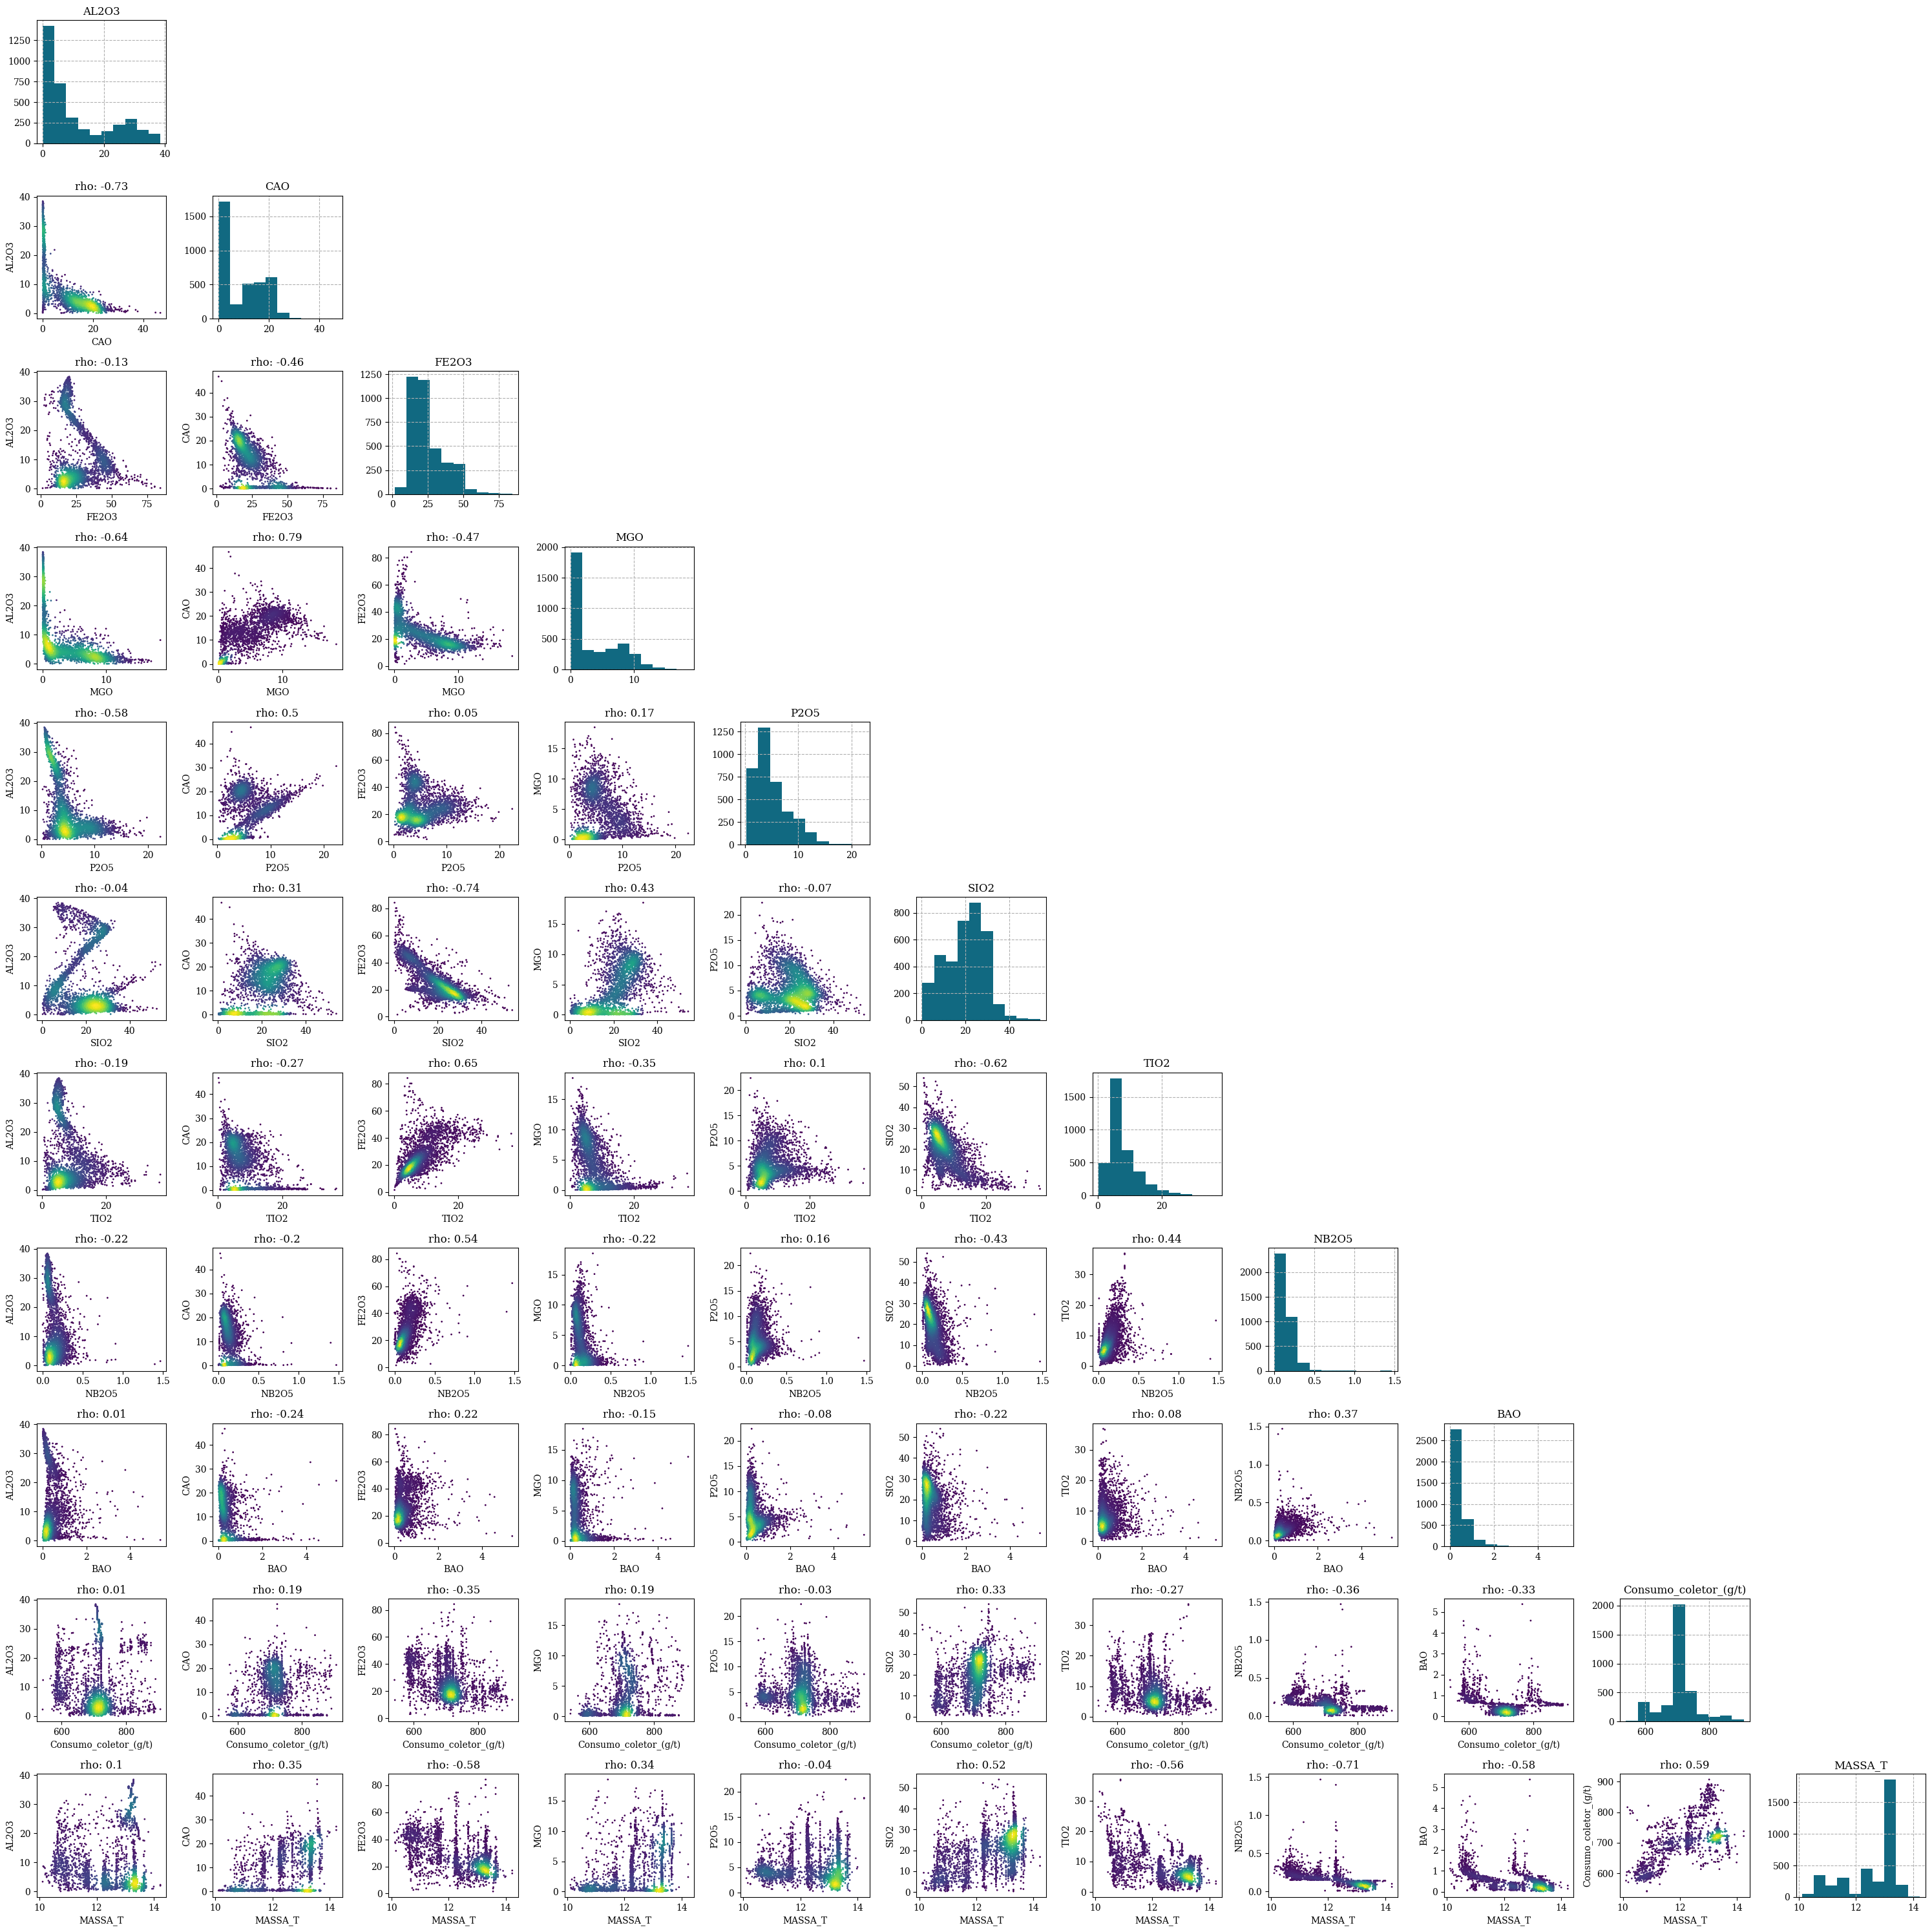

In [7]:
gv.scatter_matrix(data[variables+gmt], figsize=(30,30))

# Correlation Matrix with gv.correlation_matrix()

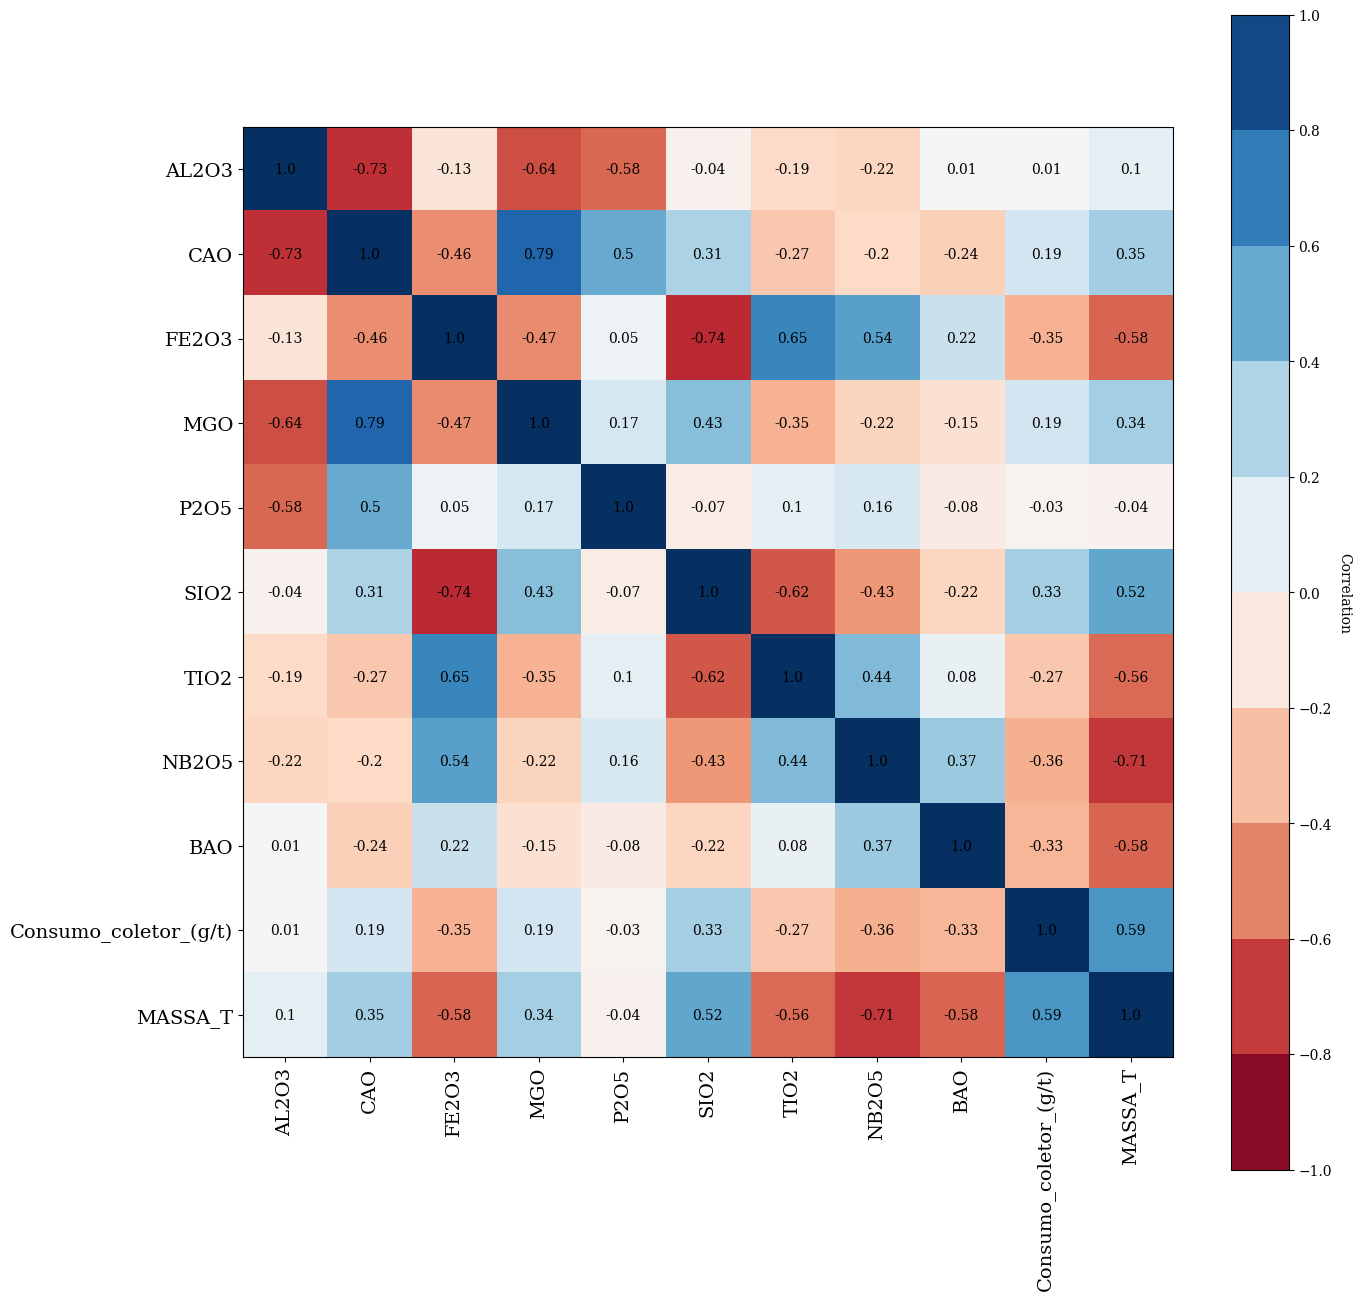

In [8]:
gv.correlation_matrix(data[variables+gmt], fsize=(15,15))

# Splitting features (X) and target (y)

In [9]:
X = data0[variables].values #declarando as variáveis ou features
y = data0[gmt[0]] #declarando a target gmt[0] ou gmt[1]

# Split train, test samples with sklearn.model_selection

In [10]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, # X features, independent variables
    y, # y target, dependet variable
    test_size=0.3, #fração de treino e teste
    shuffle=True, #embaralha os dados: evita que a divisão dos dados fique tendenciosa a uma classe
    random_state=100, #semente aleatória: garante a repoducibilidade dos resultados, ou seja, a divisão dos dados será sempre a mesma
    )


# Train size

In [11]:
print('Fração de treino:')
len(X_train)

Fração de treino:


2516

# Test size

In [12]:
print('Fração de validação:')
len(X_test)

Fração de validação:


1079

# Data transformation: StandardScaler() using Sklearn.preprocessing

$$ z = \frac{x-\mu}{\sigma}$$

Where $\mu$ is the mean of the training samples, and $\sigma$ is the standard deviation of the samples.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# só precisamos transformar o X, ou seja, as features onde serão treinados e validados os modelos
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## KNN Regressor

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [14]:
from sklearn.neighbors import KNeighborsRegressor


In [15]:
nn = 50 #número de vizinhos


knn = KNeighborsRegressor(
    n_neighbors=nn, #numero de vizinhos a ser considerados
    weights='distance', #como ele vai ponderar a proximidade das amostras (pesos), nesse caso distancia euclidiana
    p=2 #p=2 usa a distância euclidiana, weights é como ele calcula os pesos para os vizinhos
    ) 

knn.fit(X_train, y_train) #aplicando o modelo nos dados de treino

y_pred = knn.predict(X_test) #prevendo os valores a partir do modelo nos dados de teste

# Validating KNN regressor model with gv.validate_regression()

It compares the model predictions with the true values and evaluates how well the model is making predictions.

Regression validation is an essential part of data analysis and machine learning model development. It is a powerful tool that helps to evaluate the quality and performance of models, enabling you to make adjustments and improvements to obtain more accurate predictions.

This plot calculates the statistics to evaluate the performance of the regression model. These statistics include:
mean absolute deviation (MAE);

*   mean absolute deviation (MAE): the average of the absolute differences between each prediction and the corresponding true value...performance of the model!
*   mean squared error (MSE): the average of the squares of the differences...penalizes larger errors!
*   coefficient of determination (R²): how well the model fits the data!


The graph "grade x error" allows you to see how the errors are distributed across the range of true values, and to identify any patterns or trends in the errors.

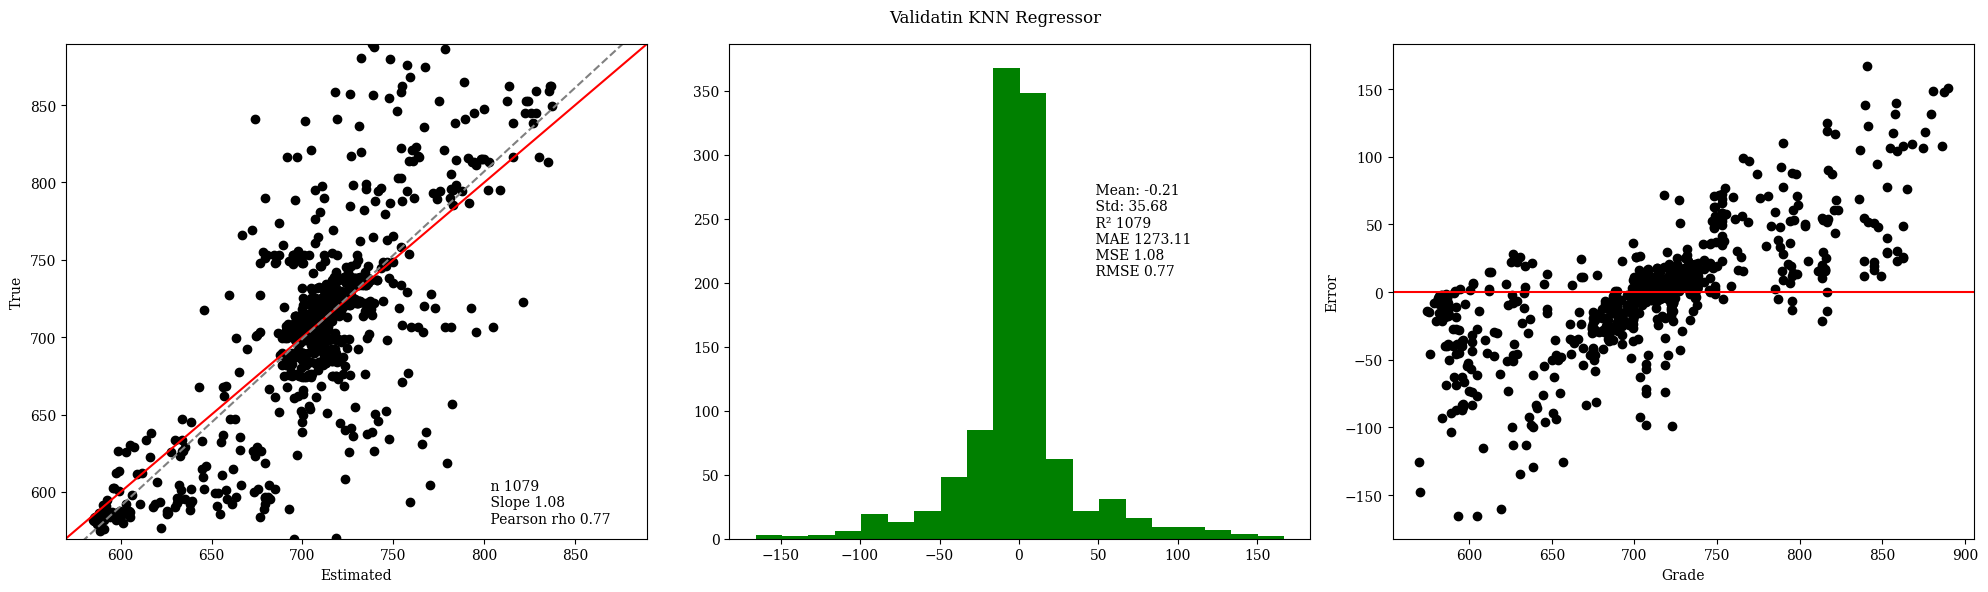

In [16]:
gv.validate_regression(y_pred, y_test, title='Validatin KNN Regressor')

## SVM

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

## Linear and RBF SVR: support vector regression

In [17]:
from sklearn.svm import SVR

In [18]:
svm = SVR(
kernel='rbf', #kernel a ser usado para a construção dos hiperplanos..
C=1, #penaliza os pontos que estão do lado errado do hiperplano, quanto maior C mais pontos sao penalizados, ou mais rigoroso.
gamma='scale', #habilitar se o kernel for rbf!
)
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)

# Validating SVM regressor model with gv.validate_regression()


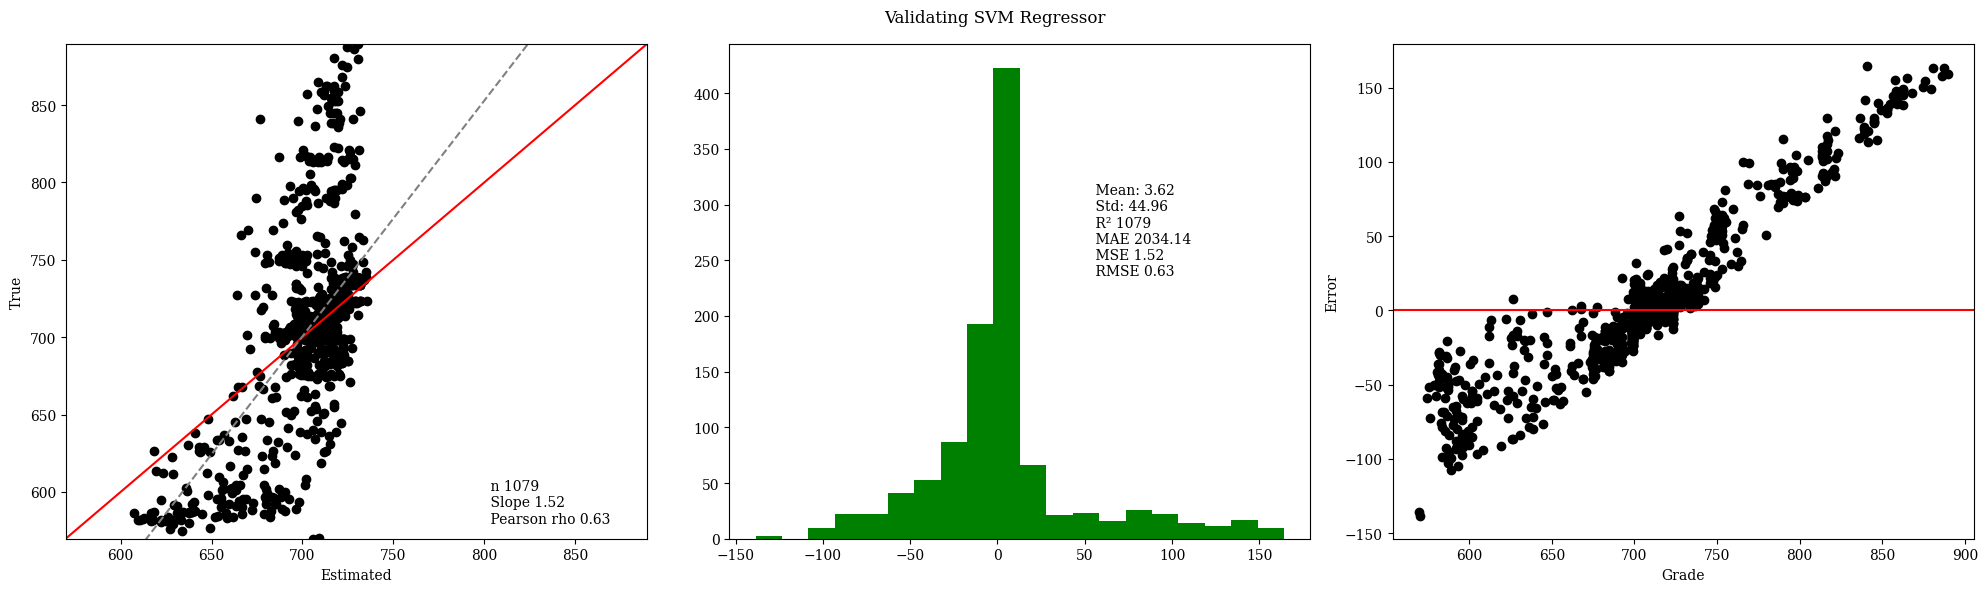

In [19]:
gv.validate_regression(y_pred, y_test, title='Validating SVM Regressor')

## Decision Tree Regressor

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
tree = DecisionTreeRegressor(
random_state=100,
max_depth=8,
min_samples_split=100
)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)


# Validating DTrees regressor model with gv.validate_regression()


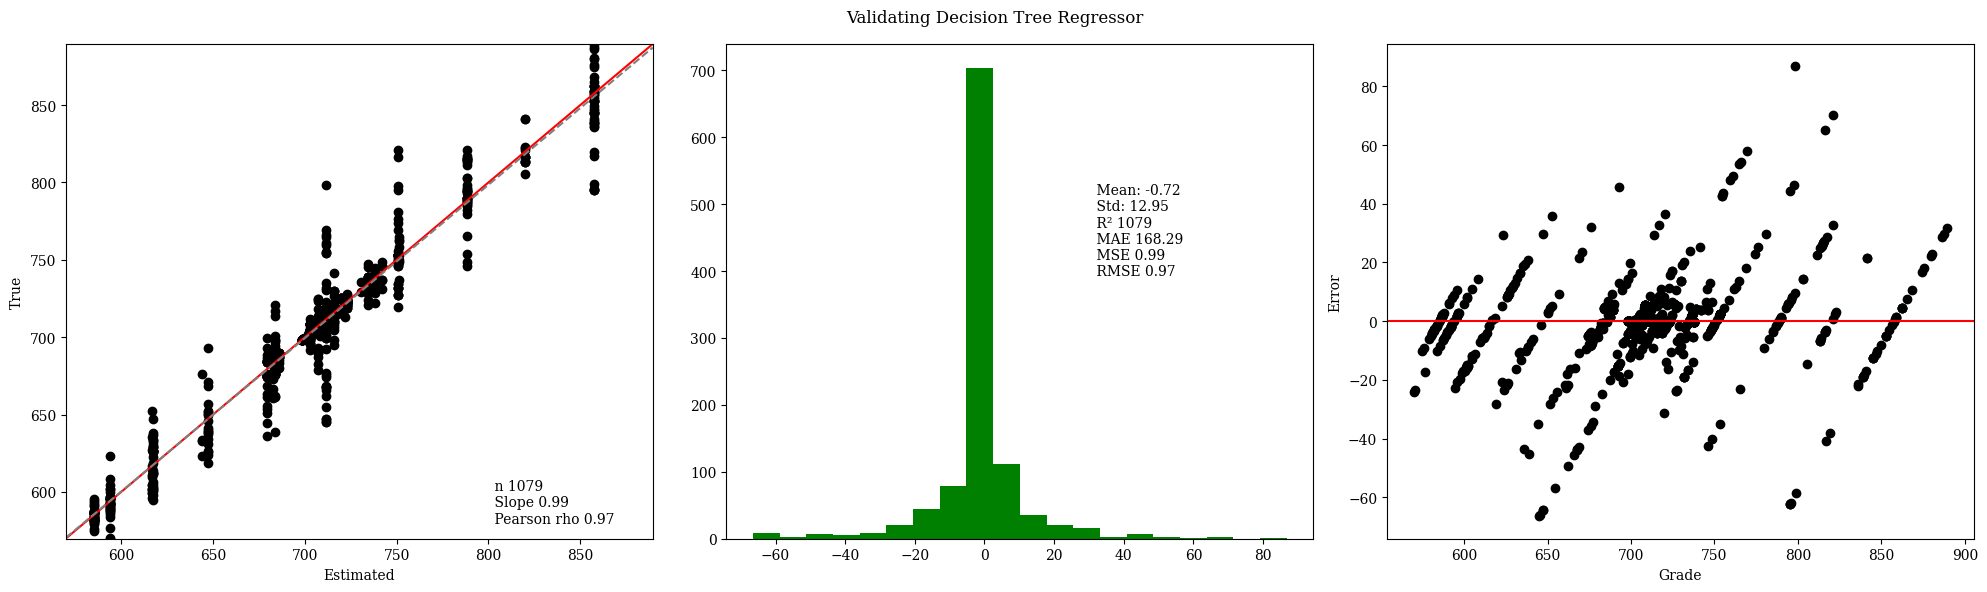

In [22]:
gv.validate_regression(y_pred, y_test, title='Validating Decision Tree Regressor')

## Random Forest Regressor

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rf = RandomForestRegressor(
n_estimators=50,
max_depth=6,
min_samples_split=10,
random_state=100,
)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

# Validating RF regressor model with gv.validate_regression()


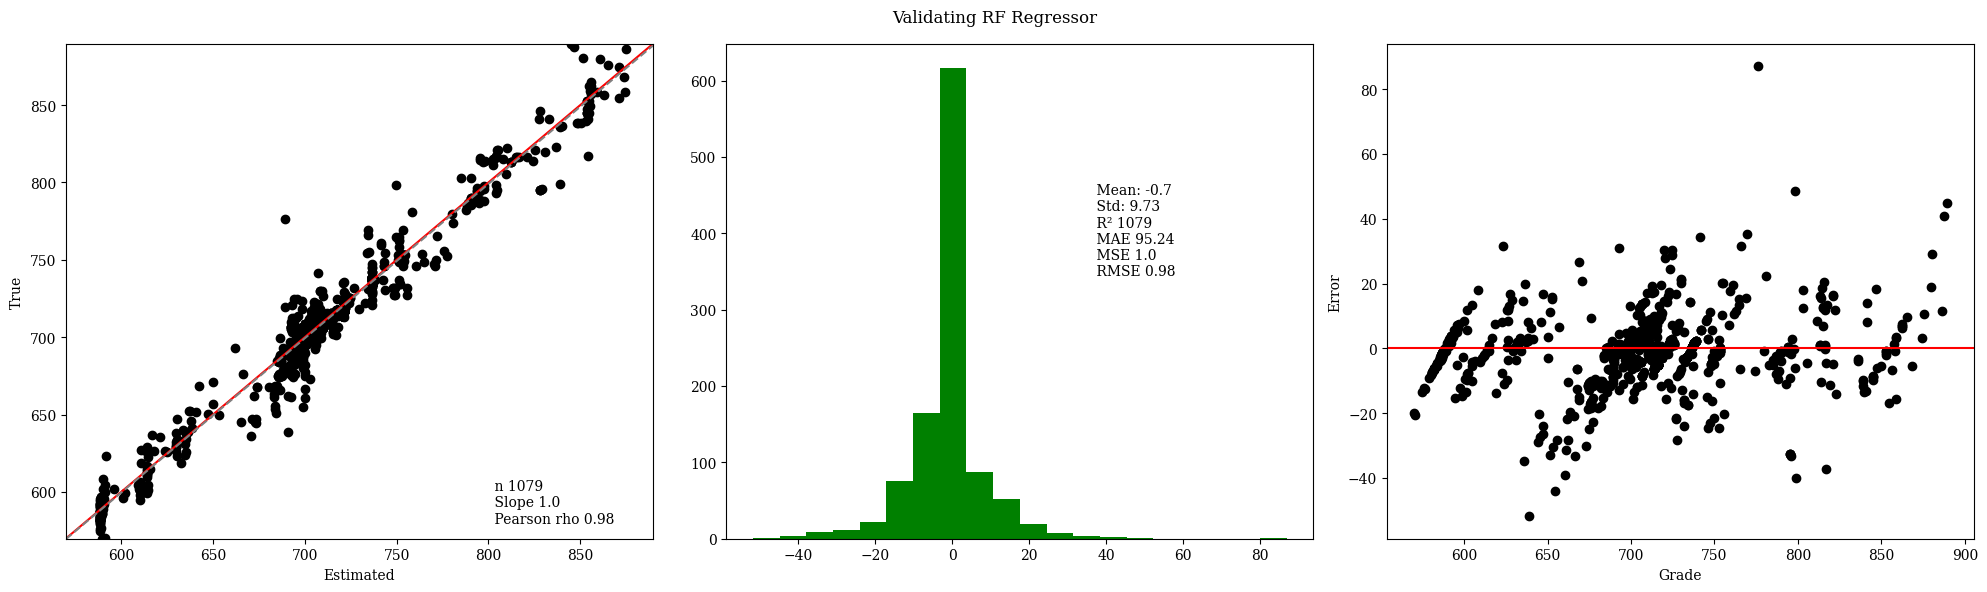

In [25]:
gv.validate_regression(y_pred, y_test, title='Validating RF Regressor')

# Which input features are most important in predicting the target variable for Random Forest Model

Note: Feature importance provides a way to identify which features have the most predictive power for a given target variable, and can be useful for optimizing model performance or gaining insights into the relationships between features and the target variable.

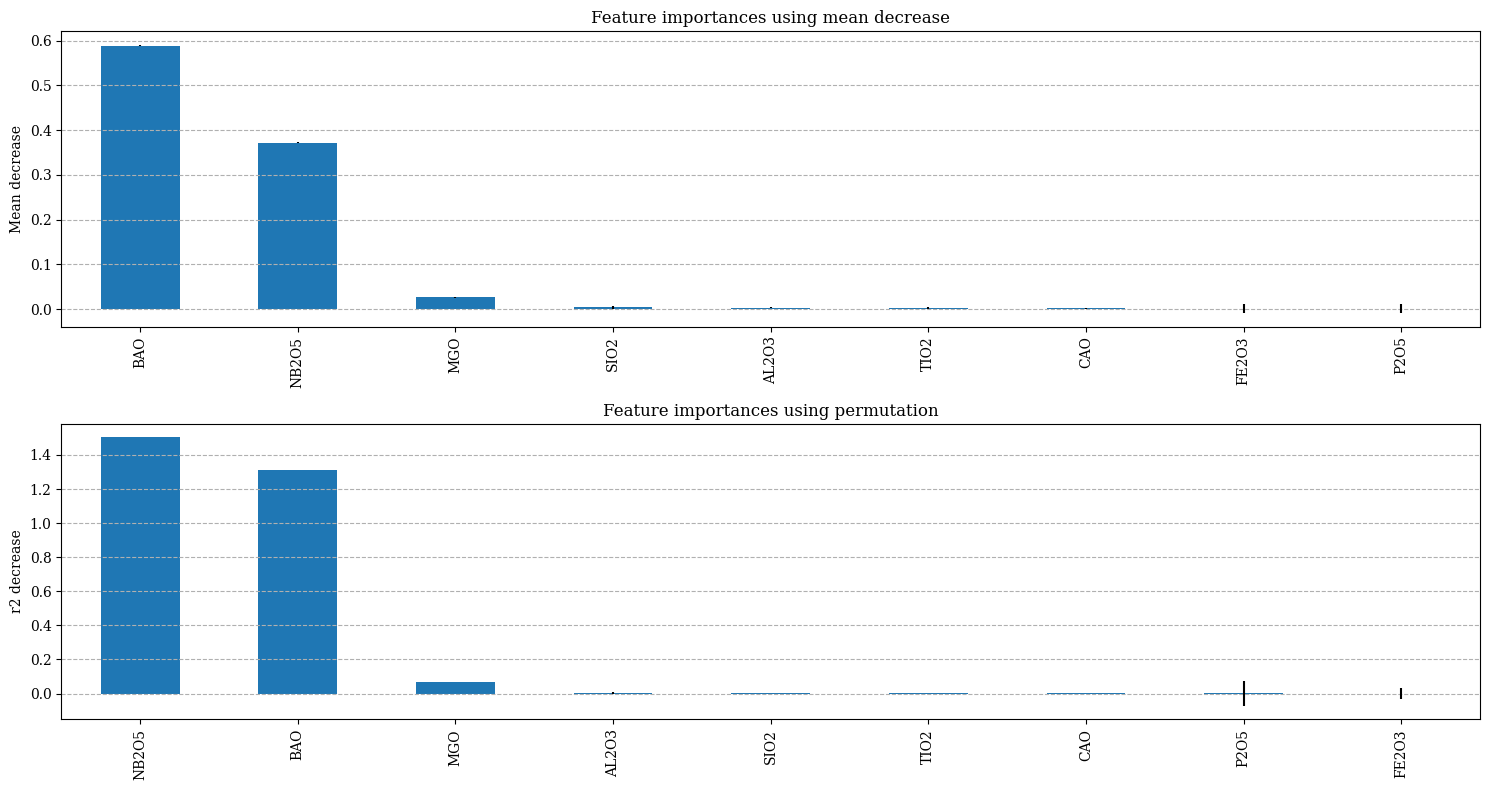

In [26]:
gv.features_importance(rf, X_test, variables, y_test, clf=False)

# Model evaluation with K-Folds

The purpose of this plot is to visualize the performance of a model when evaluated with a k-fold cross-validation strategy.

The x-axis represents the different folds used in the cross-validation (1 to k), while the y-axis represents the performance metric chosen to evaluate the model.

Each box in the plot represents the distribution of scores obtained for the corresponding fold. 

This plot can help to understand the variability of the model's performance across different folds, and whether the model is overfitting or underfitting.

If the performance is consistent across all folds, the model is likely to generalize well to new data. 

If the performance is highly variable, the model may need to be improved or re-evaluated with a different strategy.

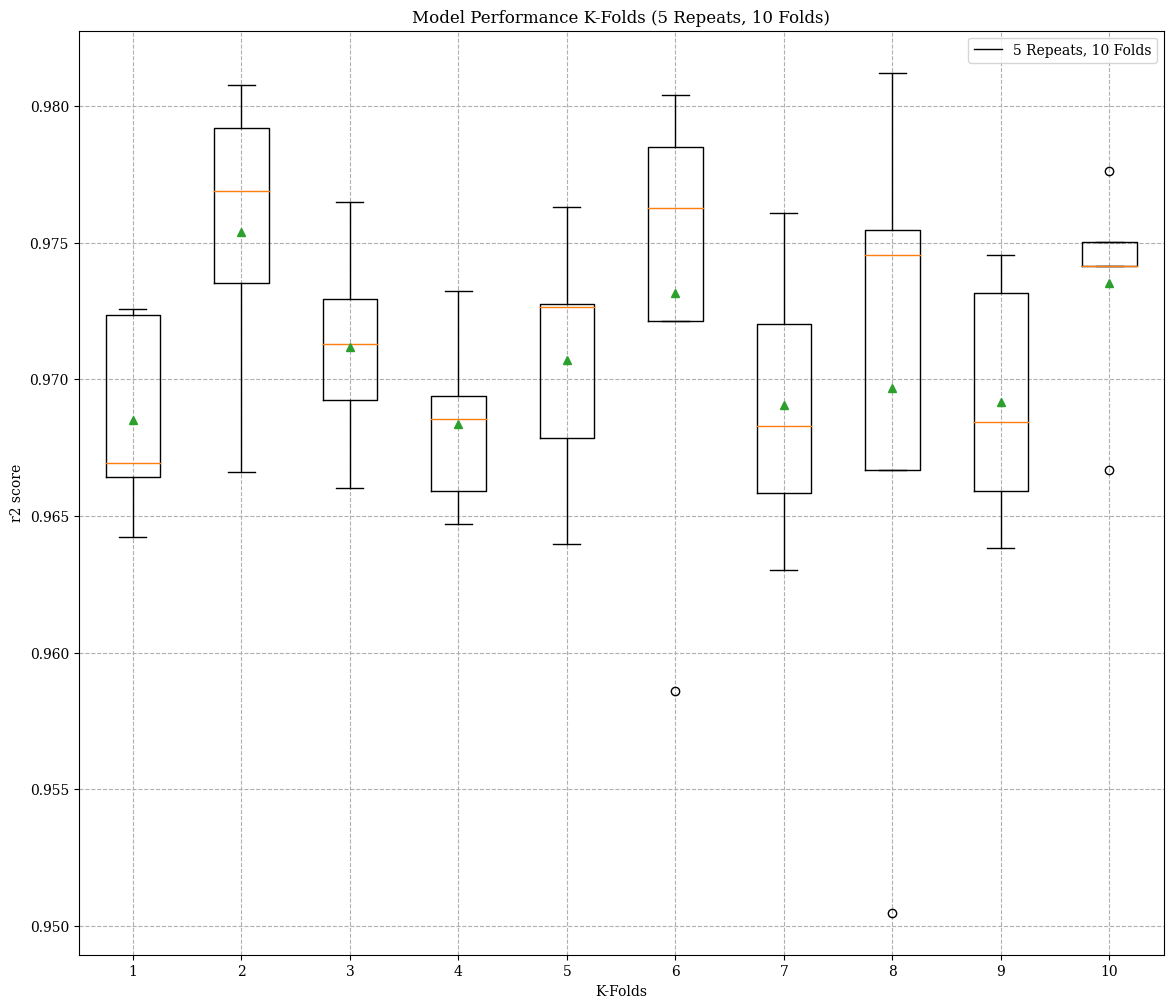

In [27]:
gv.evaluate_kfolds(X_train, y_train, 10, 5, rf, clf=False)

# Practice

In this exercise, you will reproduce the supervised learning process presented in the notebook, but with a new set of variables!

Perform a statistical analysis of the data using a scatter matrix and a correlation matrix to understand the distributions and their correlations.

In [ ]:
## code

Define your features to be used for training the model and your geometalurgical target variable. 

Note: try not to use the same target variable as the one used in the group exercise to obtain different tests.

In [ ]:
## code

Preprocess the data by applying standardization with **StandardScaler()**.

Remember... only for your features! 

And... don't forget to apply it to your test and train variables.


In [ ]:
## code

Choose one of the algorithms worked on and explained, and train your model, then perform its validations! 

Remember... training the model is done only on your training data, while the validations are performed on the test data!


In [ ]:
## code

Plot a regression validation of your model with **gv.validate_regression()**.

In [ ]:
## code